# Telco Churn Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [90]:

import numpy as np 
import pandas as pd 
from io import StringIO
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import io
from io import StringIO
import string
from collections import Counter

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO





In [91]:
from google.colab import files
  
  
uploaded = files.upload()
telco_base_data = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (3).csv


**Load the data file **

Look at the top 5 records of data

In [92]:
telco_base_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [93]:
telco_base_data.shape

(7043, 21)

In [94]:
telco_base_data.columns #all features with a taregt

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [95]:
telco_base_data.dtypes #checking data tyoes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [96]:
telco_base_data.describe() #only numeric variables

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

SeniorCitizen: categorical => 25%-50%-75% not 

25% customers have tenure less than 9 months
75% customers have tenure less than 55 months


 25% (percentile) : 25% of data is less than this 35.5
 OR 75 % of customers have more than 35.5


 75% : 75% of customers have less than 89.5 monthly charges.
 OR 25% of customers pay more than 89.85 usd. per month

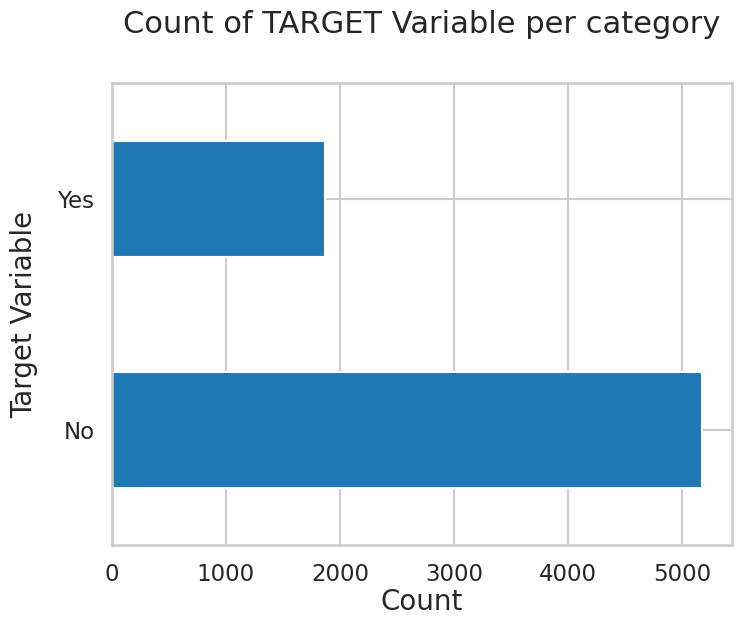

In [97]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=1)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [98]:
telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [99]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [100]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
(telco_base_data.isnull().sum())*100/telco_base_data.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

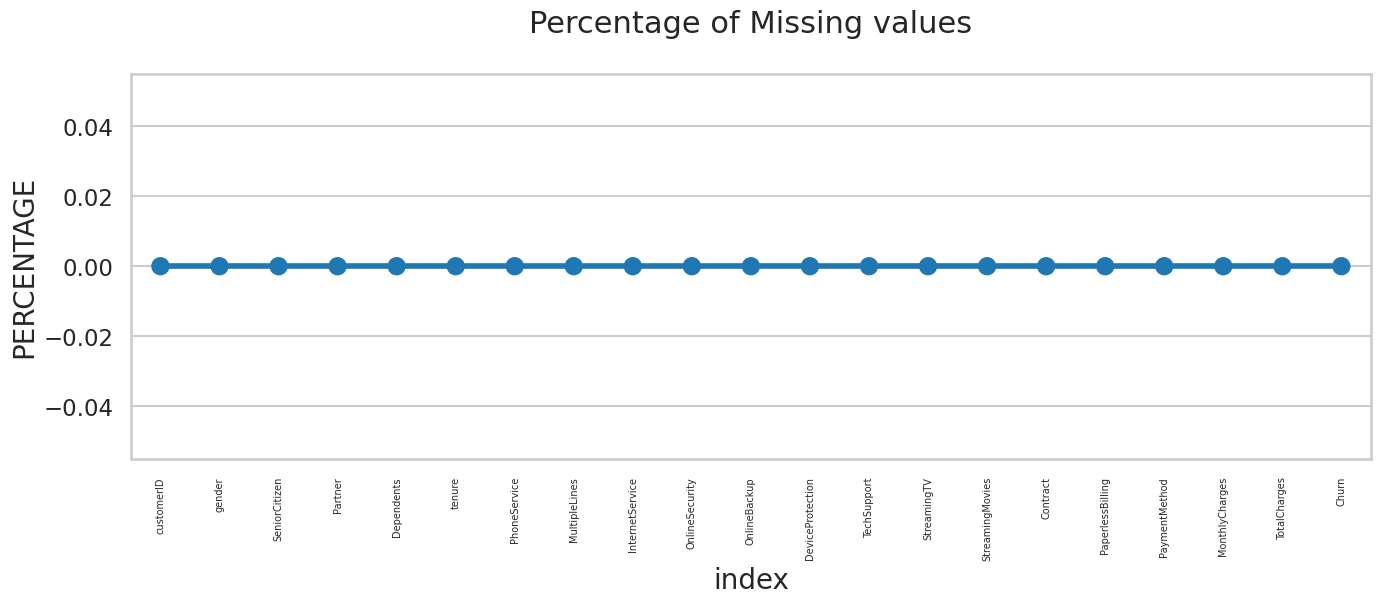

In [102]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Cleaning


In [103]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [104]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce') 
#errors='coerce'=  if there are any values in the 'TotalCharges' column that cannot be converted to numeric, they will be replaced with NaN (Not a Number) values.
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 missing values in TotalCharges . igonore them

In [105]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

 Missing Value Treatement

In [106]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)
# any row containing at least one missing value should be dropped.


#or can be filled by 0 
#telco_data.fillna(0)

In [107]:
telco_data.shape

(7032, 21)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [108]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [111]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
 #[1, 13, 25, ..., 61]

# tenure- group will be added and then we dont need tenure : we will drop it

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [121]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [122]:
telco_data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No        1 - 12  
1               Mailed check          56.95      1889.50     No       25 - 36  
2               Mailed check          53.85       108.15    Yes        1 - 12  
3  Bank transfer (automatic)          42.30      1840.75     No       37 - 48  
4           Electronic check          70.70       151.65    Yes        1 - 12  

[5 rows x 22 columns]

In [123]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [124]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn tenure_group  
0           Electronic check           29.85         29.85    No       1 - 12  
1               Mailed check           56.95       1889.50    No      25 - 36  
2               Mailed check           53.85        108.15   Yes       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75    No      37 - 48  
4           Electronic check           70.70        151.65   Yes       1 - 12

Plotting distibution of individual predictors by churn

In [125]:
telco_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

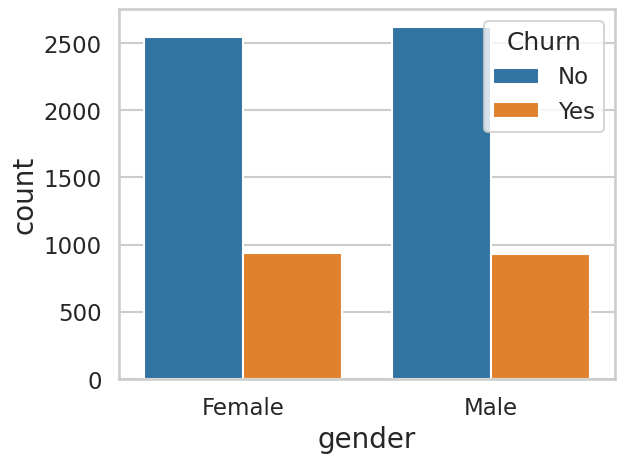

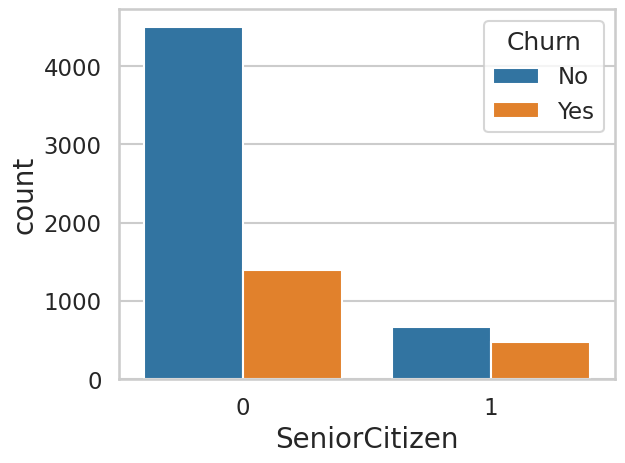

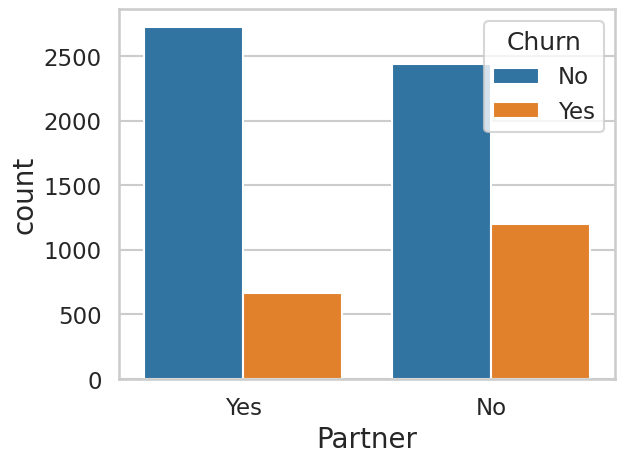

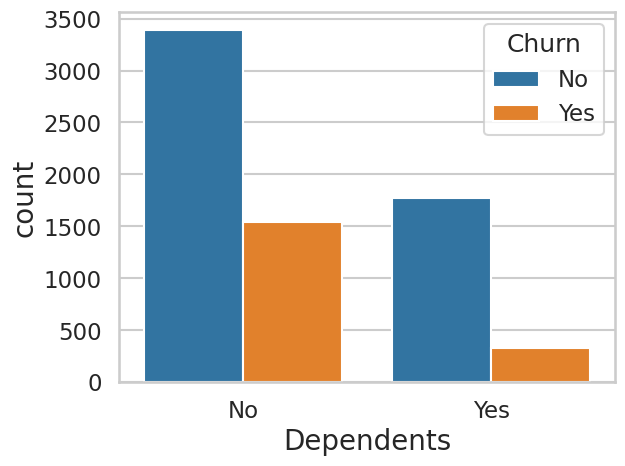

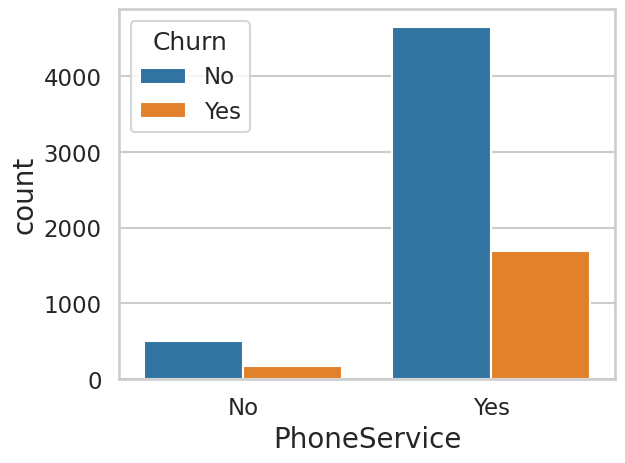

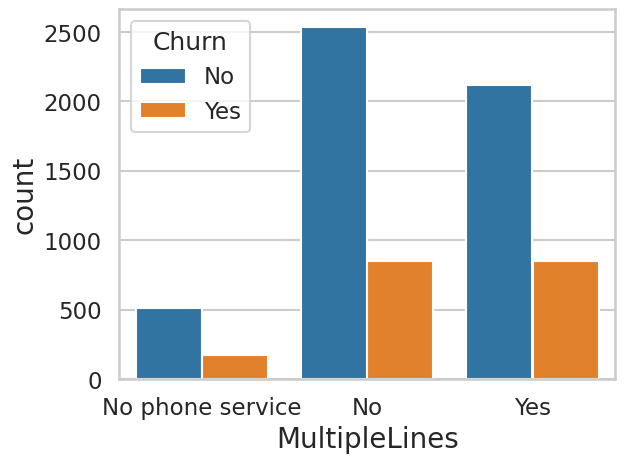

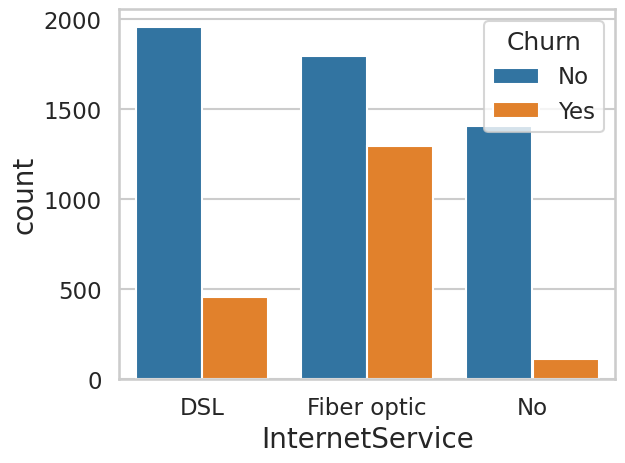

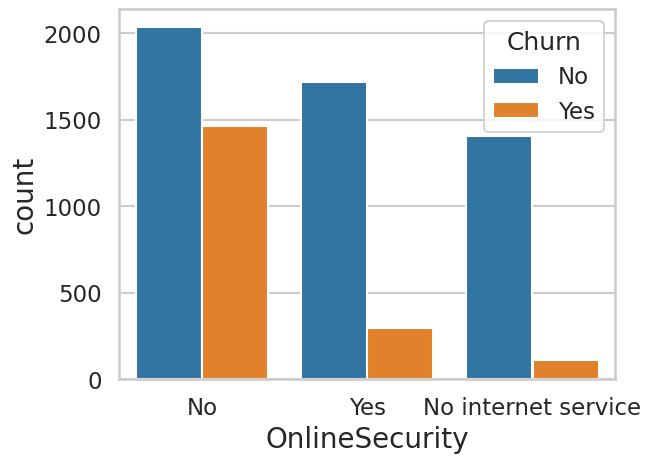

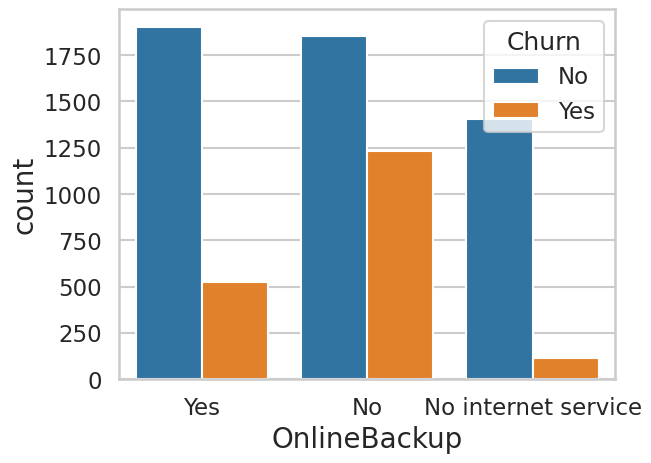

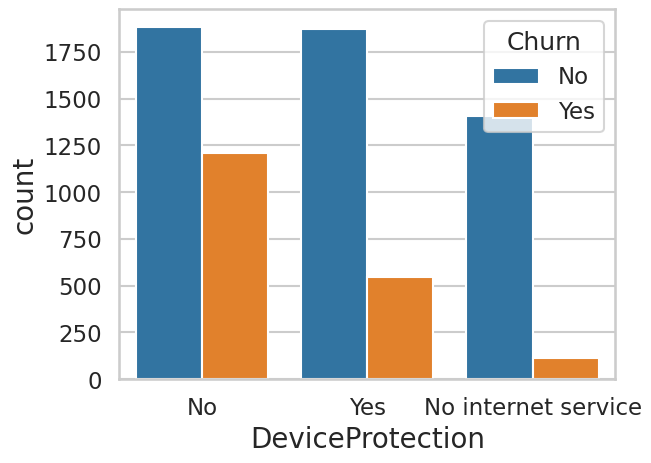

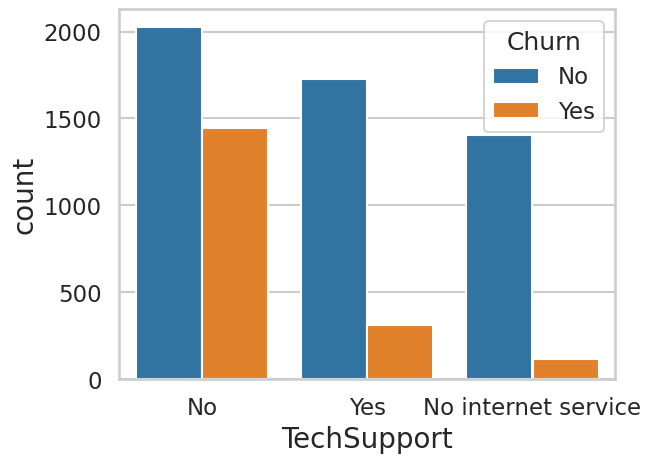

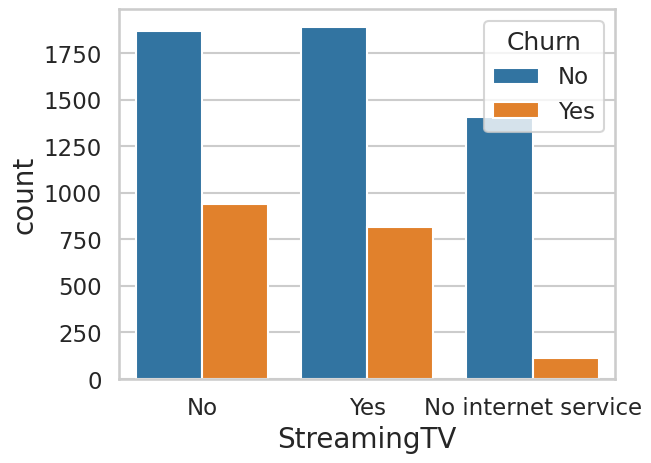

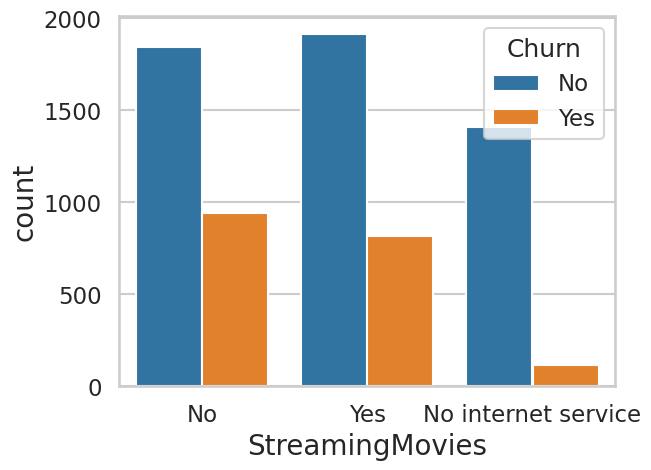

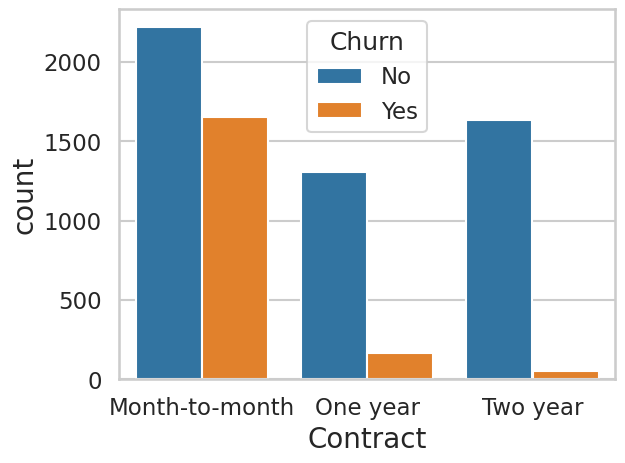

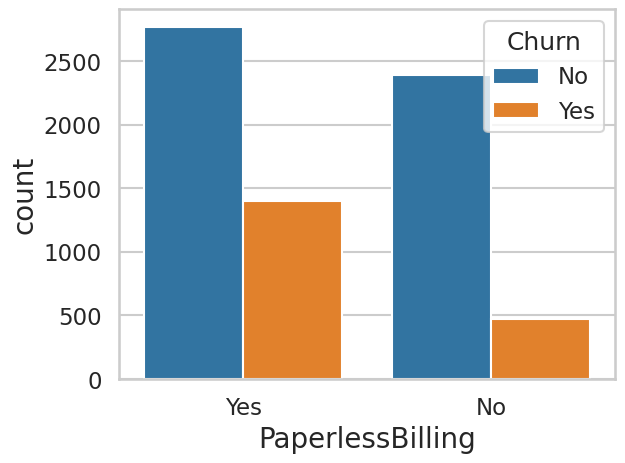

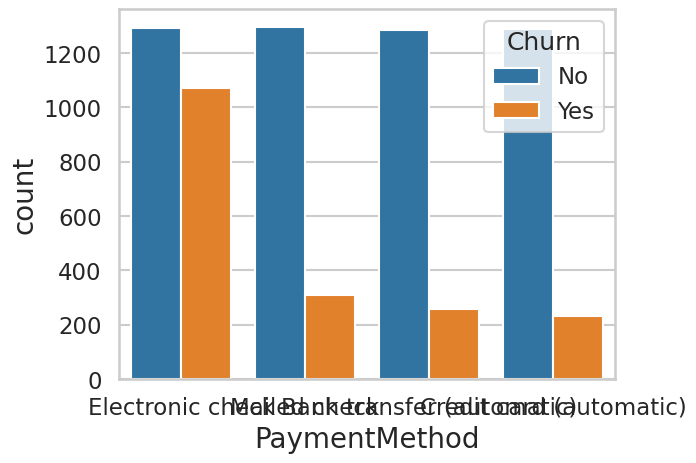

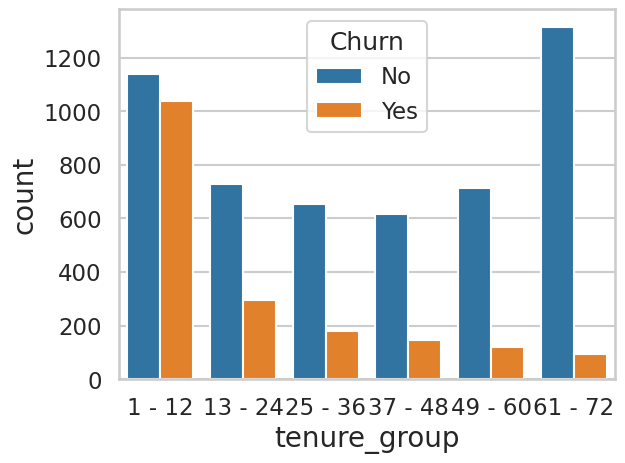

In [126]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [127]:
telco_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

converting the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [128]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [129]:
telco_data.head()

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0  Female              0     Yes         No           No  No phone service   
1    Male              0      No         No          Yes                No   
2    Male              0      No         No          Yes                No   
3    Male              0      No         No           No  No phone service   
4  Female              0      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Churn tenure_group  
0           Electronic check           29.85         29.85      0       1 - 12  
1               Mailed check           56.95       1889.50      0      25 - 36  
2               Mailed check           53.85        108.15      1       1 - 12  
3  Bank transfer (automatic)           42.30       1840.75      0      37 - 48  
4           Electronic check           70.70        151.65      1       1 - 12

In [130]:
telco_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   PhoneService      7032 non-null   object  
 5   MultipleLines     7032 non-null   object  
 6   InternetService   7032 non-null   object  
 7   OnlineSecurity    7032 non-null   object  
 8   OnlineBackup      7032 non-null   object  
 9   DeviceProtection  7032 non-null   object  
 10  TechSupport       7032 non-null   object  
 11  StreamingTV       7032 non-null   object  
 12  StreamingMovies   7032 non-null   object  
 13  Contract          7032 non-null   object  
 14  PaperlessBilling  7032 non-null   object  
 15  PaymentMethod     7032 non-null   object  
 16  MonthlyCharges    7032 n

Convert all the categorical variables into dummy variables i.e converting into numerical form for analysis

In [131]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [132]:
telco_data_dummies.head()

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0           29.85         29.85      0              1   
1              0           56.95       1889.50      0              0   
2              0           53.85        108.15      1              0   
3              0           42.30       1840.75      0              0   
4              0           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0            0           0            1              1               0  ...   
1            1           1            0              1               0  ...   
2            1           1            0              1               0  ...   
3            1           1            0              1               0  ...   
4            0           1            0              1               0  ...   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_1 - 12  tenure_group_13 - 24  \
0                           0                    1                     0   
1                           1                    0                     0   
2                           1                    1                     0   
3                           0                    0                     0   
4                           0                    1                     0   

   tenure_group_25 - 36  tenure_group_37 - 48  tenure_group_49 - 60  \
0                     0                     0                     0   
1                     1                     0                     0   
2                     0                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   tenure_group_61 - 72  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 51 columns]

Monthly Charges and Total Charges

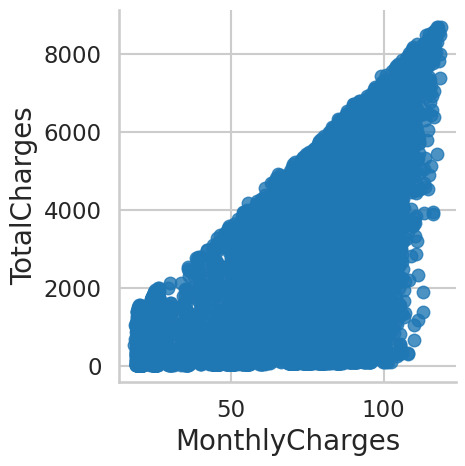

In [133]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

Now, churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

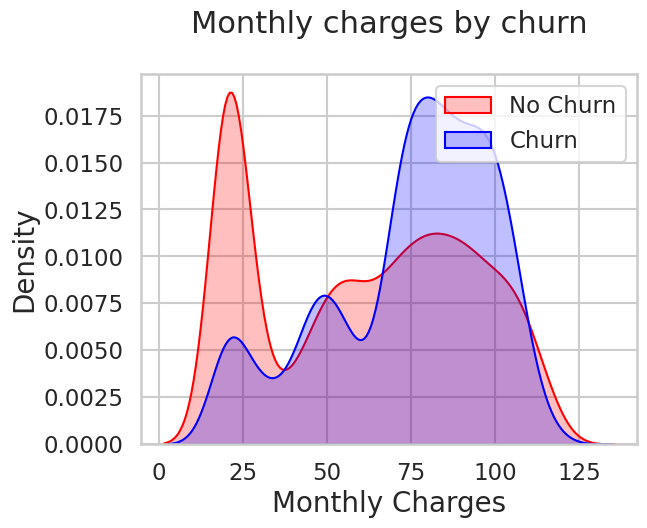

In [134]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

Text(0.5, 1.0, 'Total charges by churn')

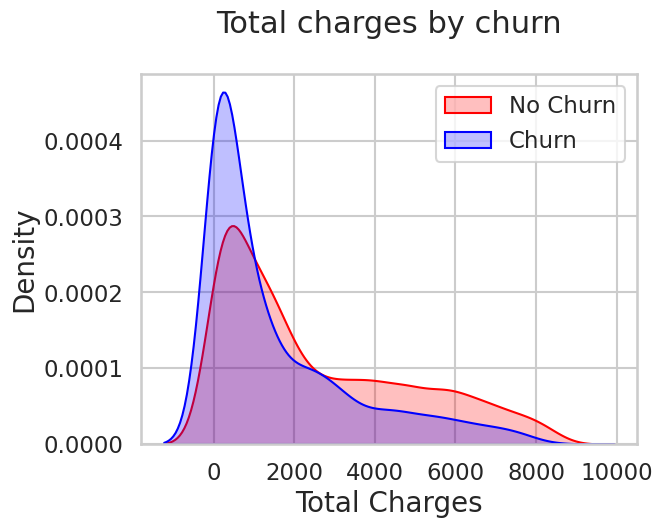

In [135]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

here: higher Churn at lower Total Charges

combining the insights of 3 parameters : tenure, monthly charges & total charges  => 
higher monthly charge at lower tenure results into lower tc =>**Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

 corelation of all predictors with 'Churn'


<Axes: >

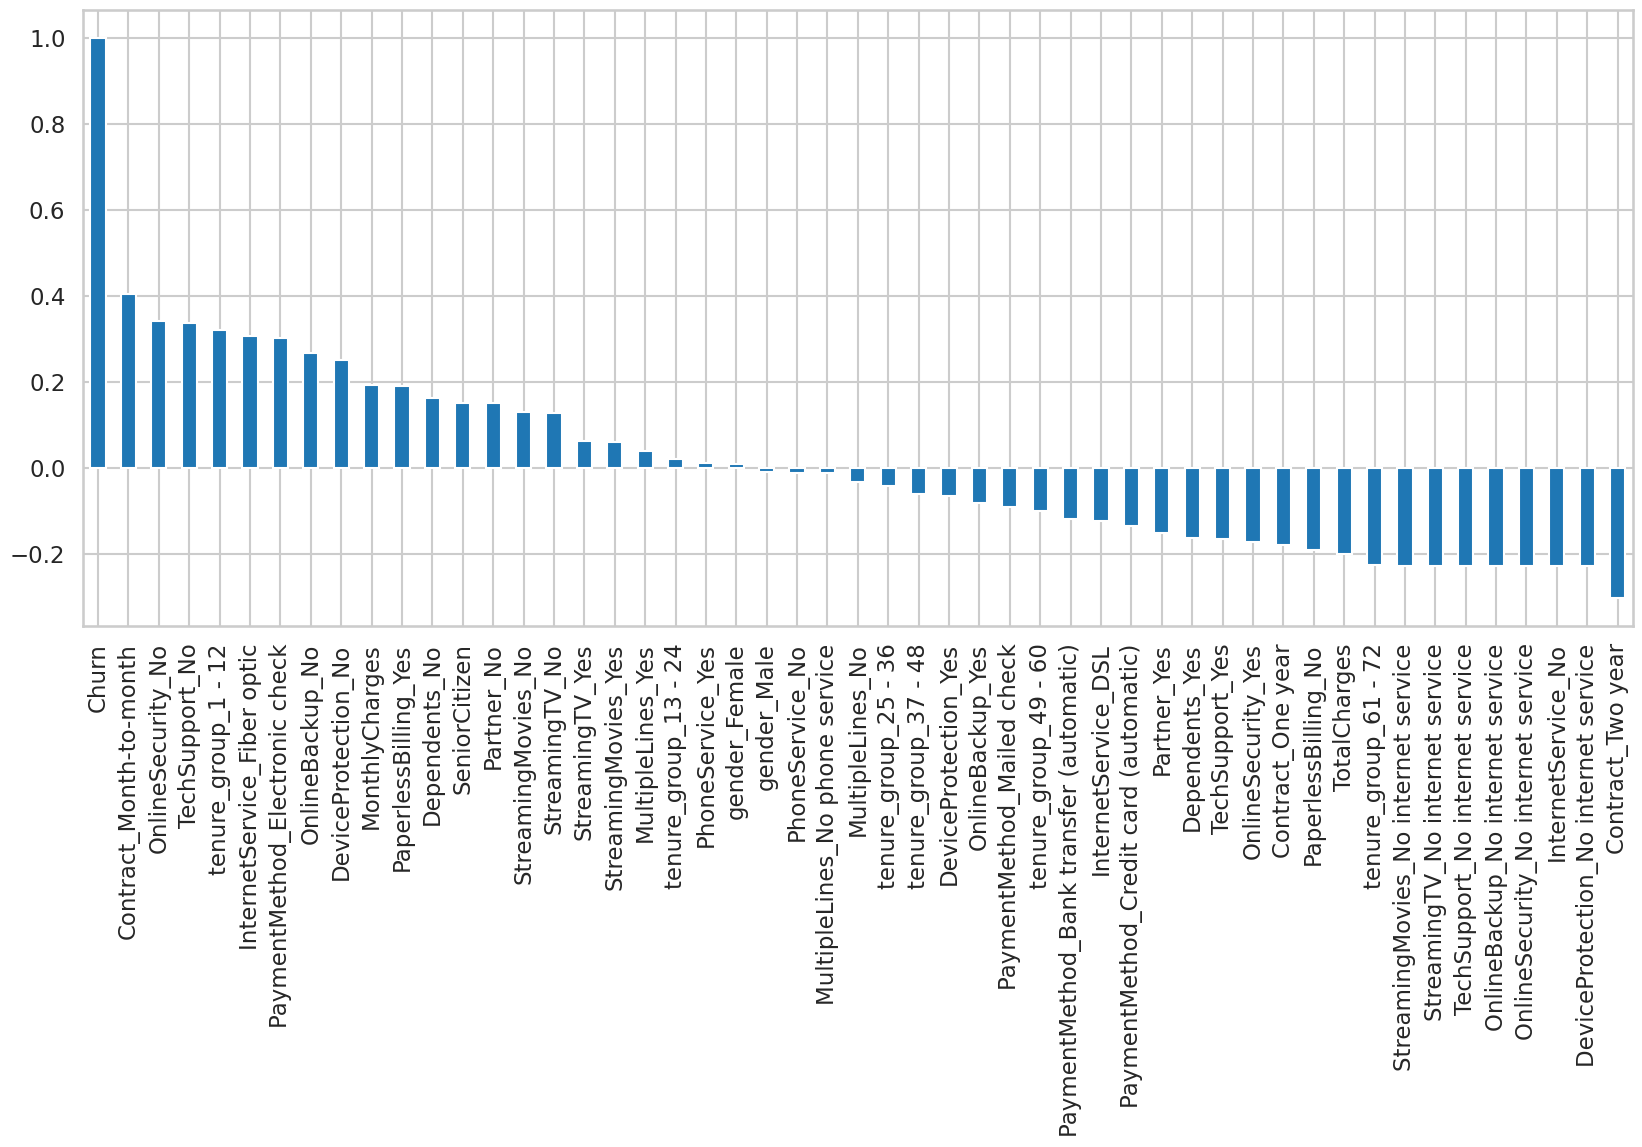

In [136]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn


Now heatmap

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

In [148]:
telco_data_dummies.shape

(7032, 51)

In [149]:
telco_data_dummies.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

<Axes: >

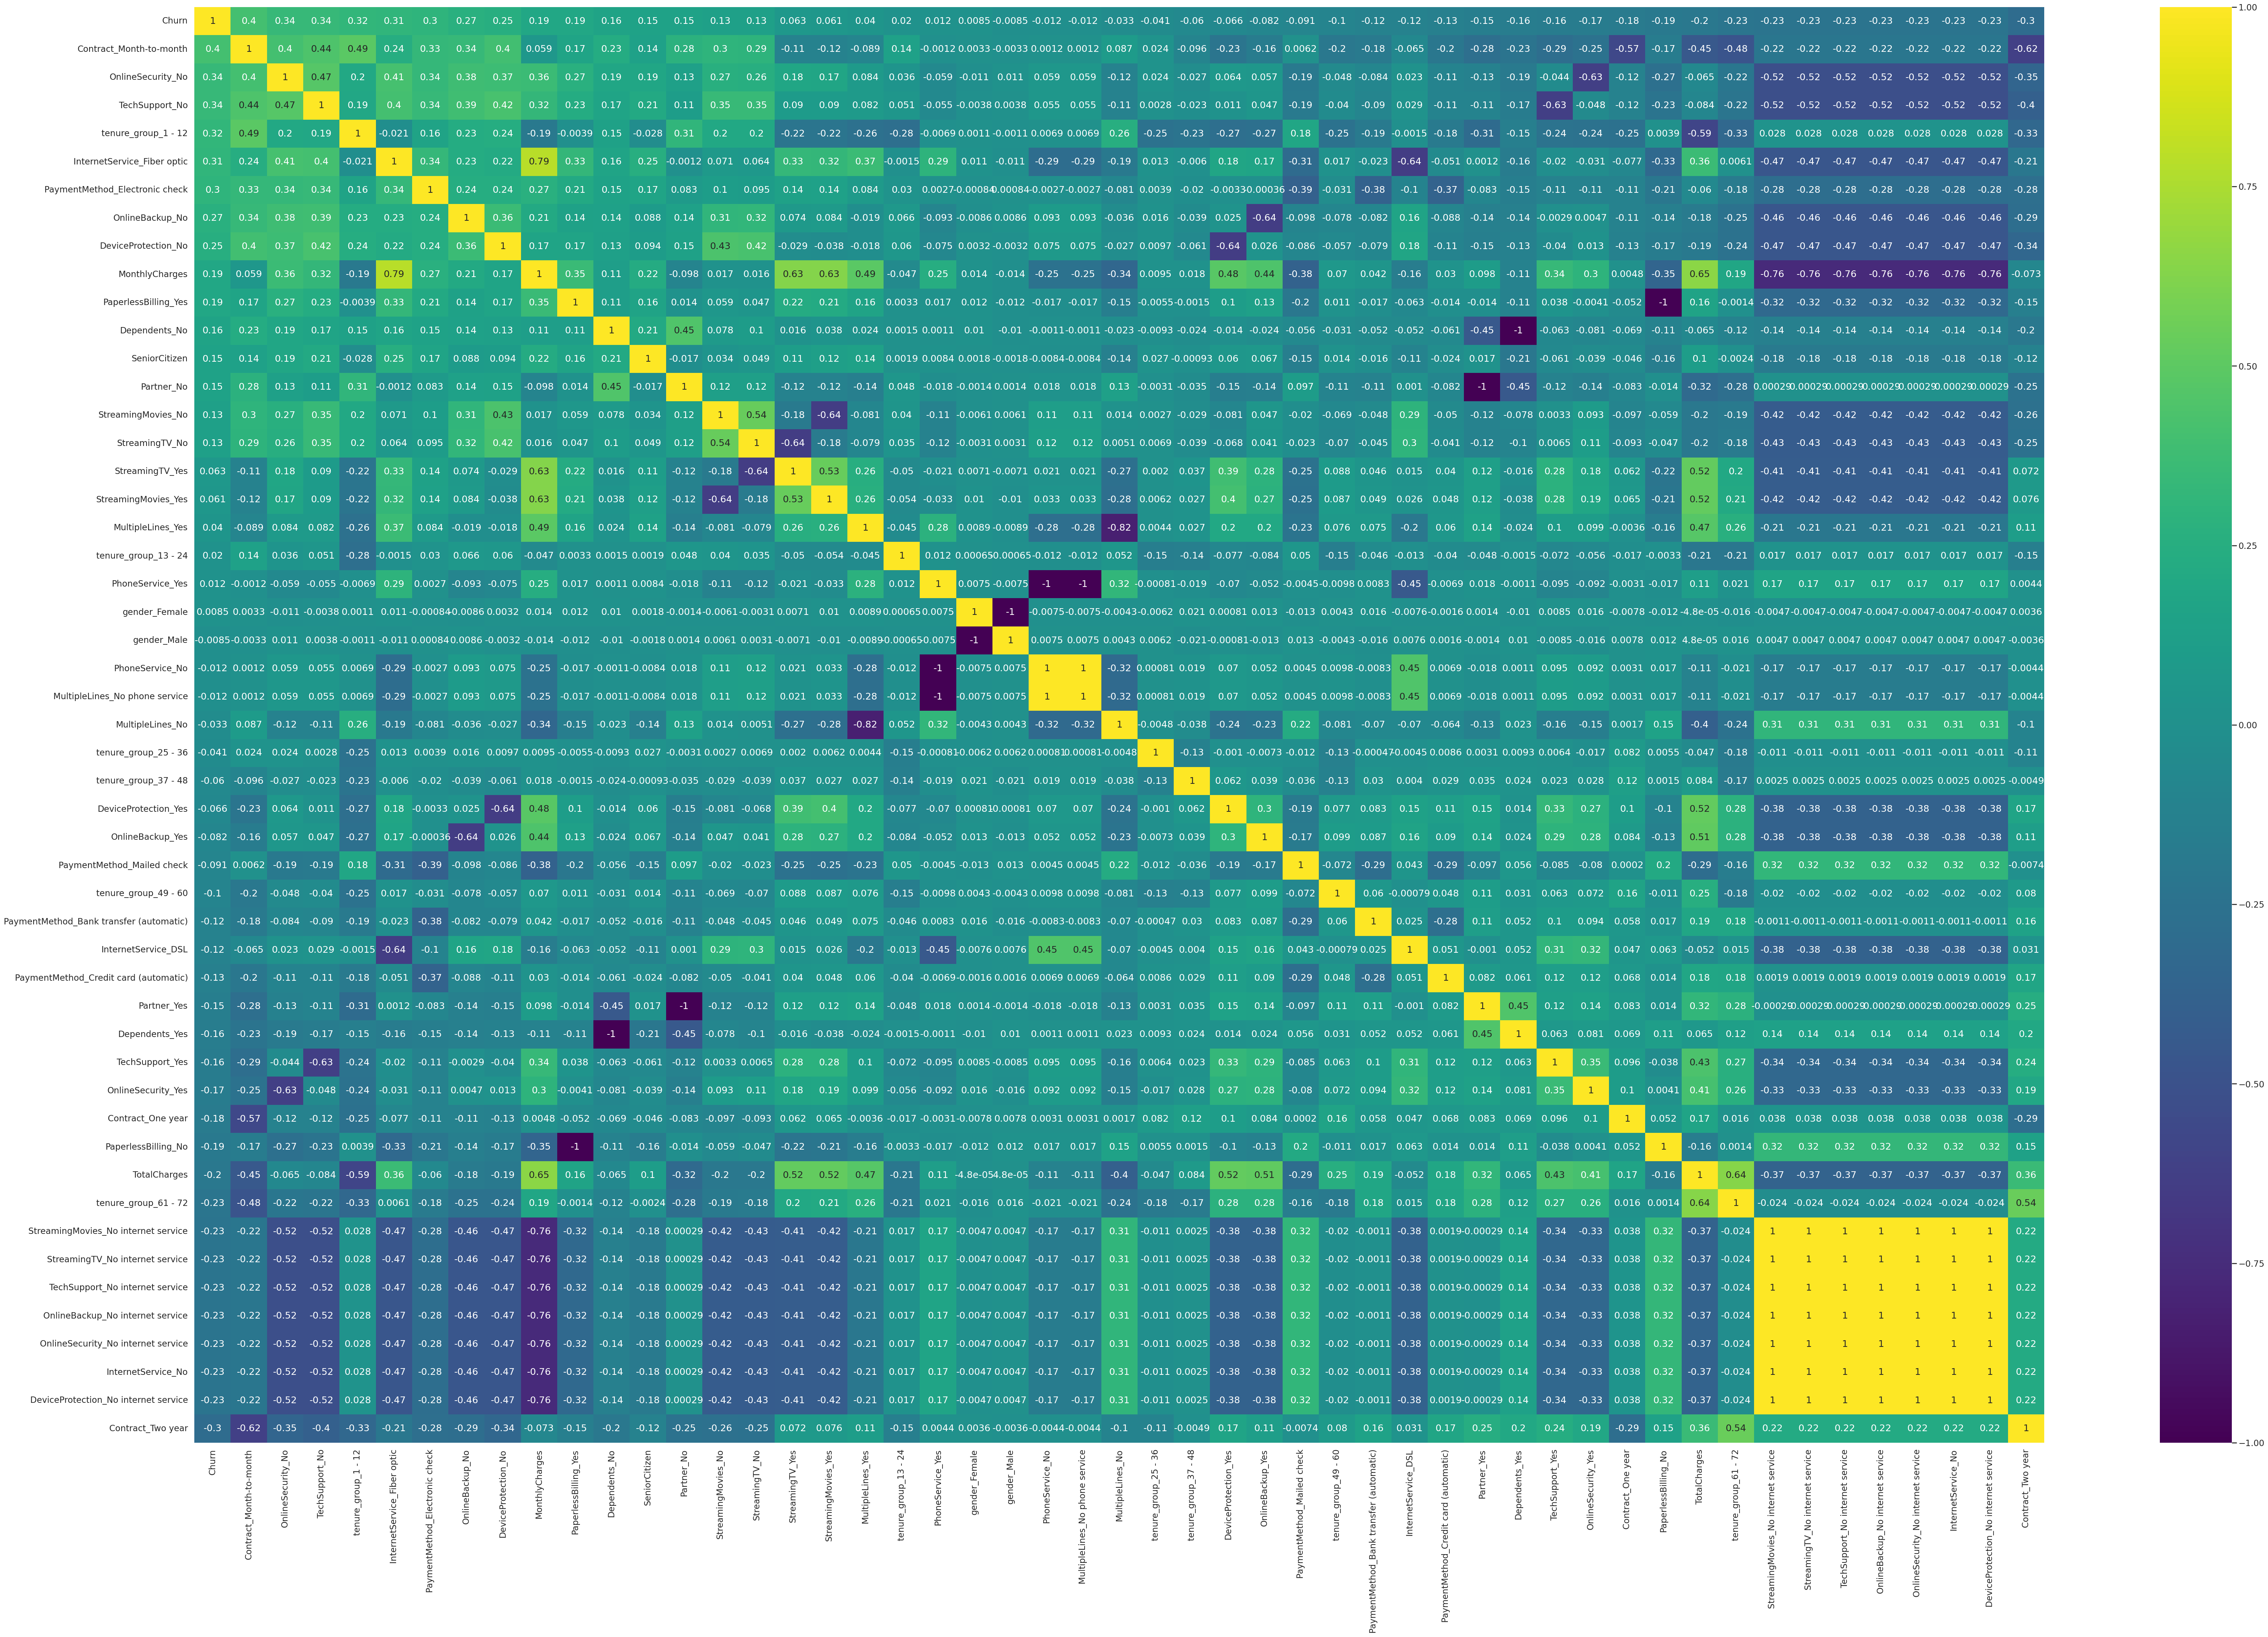

In [157]:
#Quality correlation matrix
k = 51
 #number of variables for heatmap
cols = telco_data_dummies.corr().nlargest(k, 'Churn')['Churn'].index
cm = telco_data_dummies[cols].corr()
plt.figure(figsize=(80,50))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [167]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [170]:
corr_features = correlation(telco_data_dummies, 0.7)
len(set(corr_features))

15

In [172]:
corr_features

{'Dependents_Yes',
 'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'PaperlessBilling_Yes',
 'Partner_Yes',
 'PhoneService_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service',
 'gender_Male'}

Box Plot


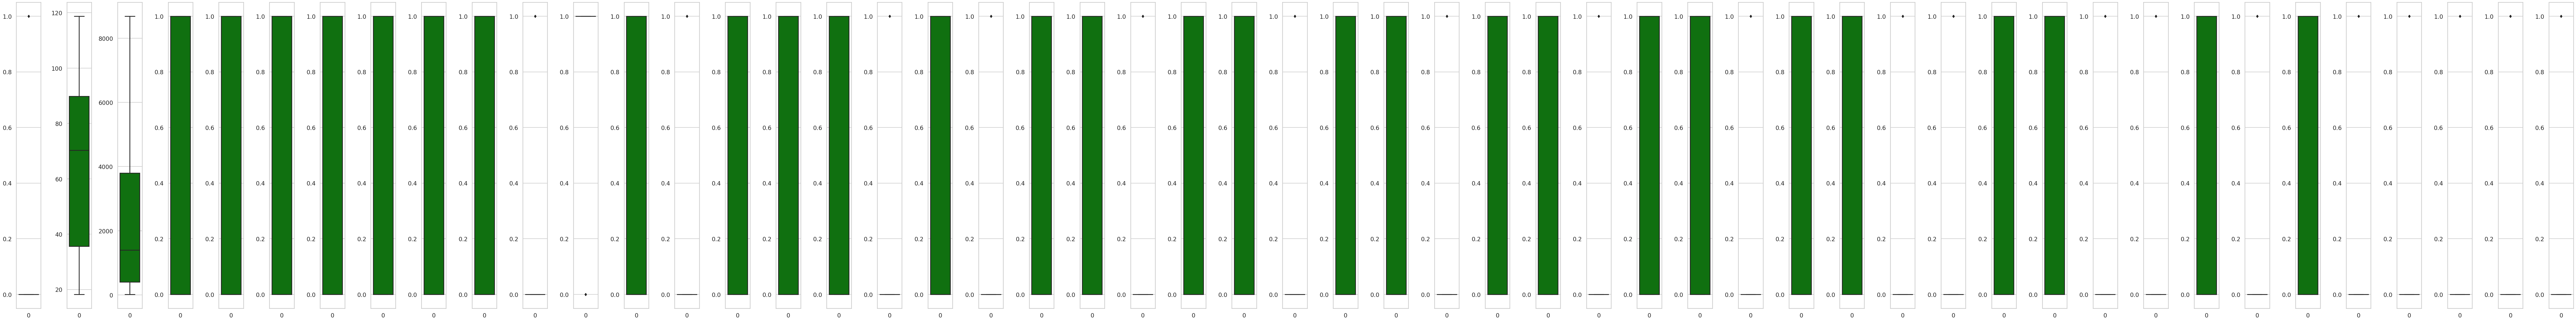

In [171]:
l = telco_data_dummies.columns.values
number_of_columns=51
number_of_rows = (int)(len(l)-1/number_of_columns)
plt.figure(figsize=(2*number_of_columns,13*number_of_rows))

for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(telco_data_dummies[l[i]],color='green',orient='v')
    plt.tight_layout()

To check distribution-Skewness

<ipython-input-187-cce576ec86f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_data_dummies[l[i]],kde=True)
<ipython-input-187-cce576ec86f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_data_dummies[l[i]],kde=True)
<ipython-input-187-cce576ec86f8>:4: UserWarning: 

`distplot` 

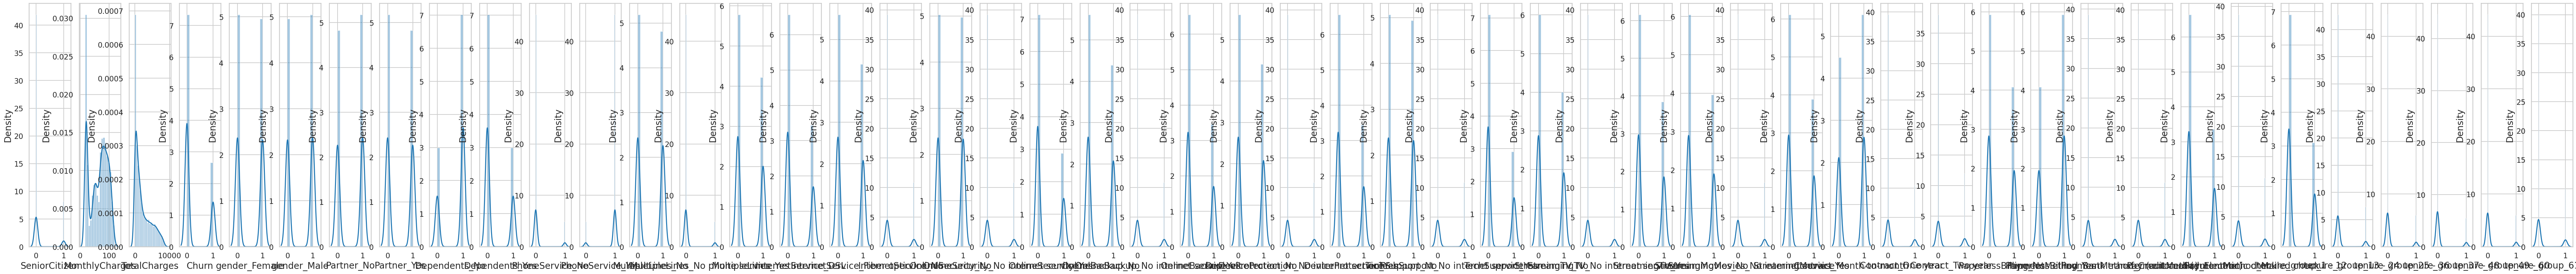

In [187]:
plt.figure(figsize=(2*number_of_columns,12*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(telco_data_dummies[l[i]],kde=True) 
    



now: bivariate analysis

In [138]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [139]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

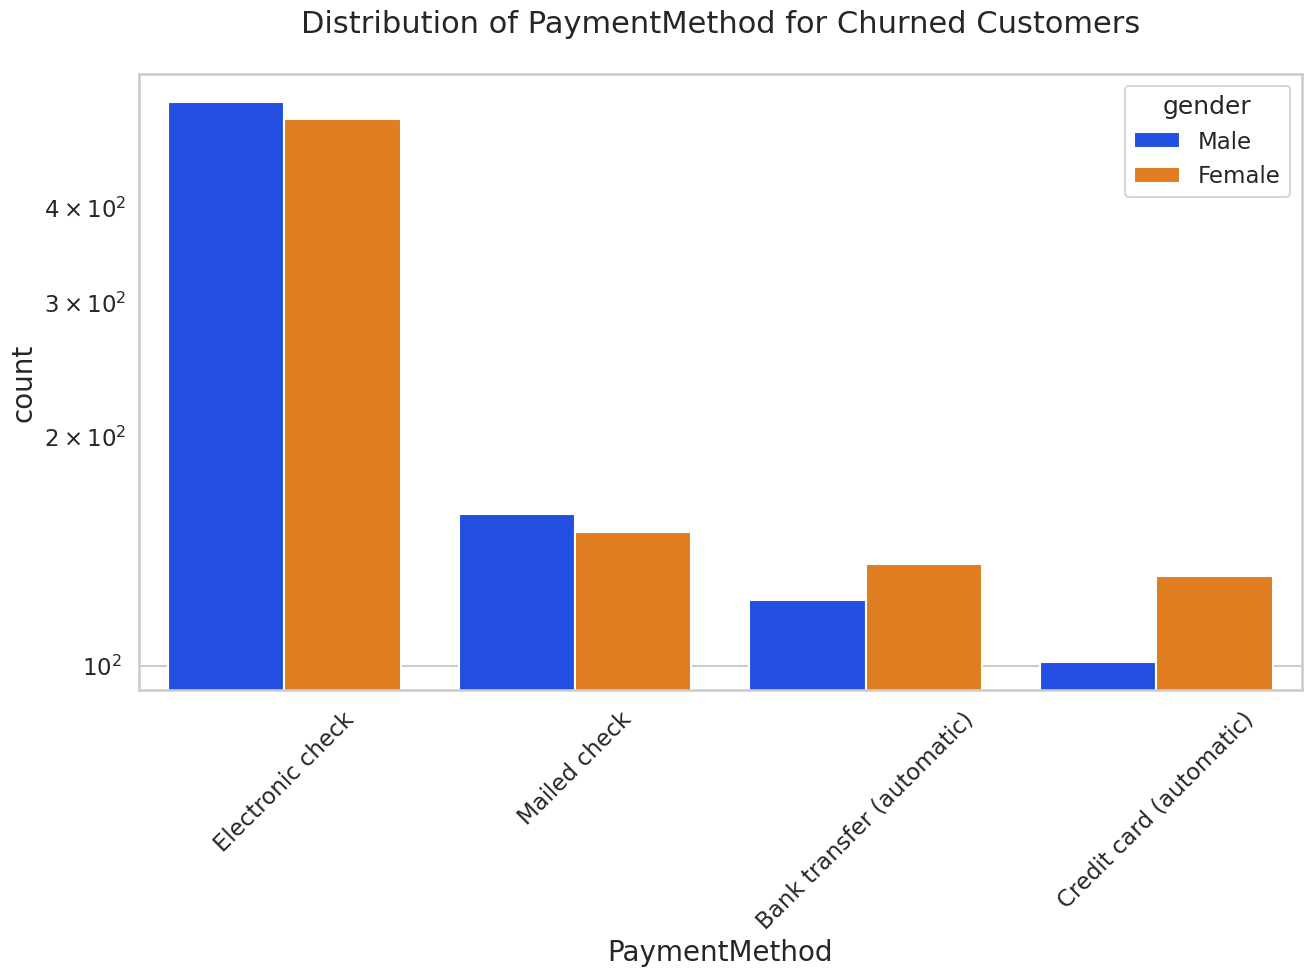

In [140]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

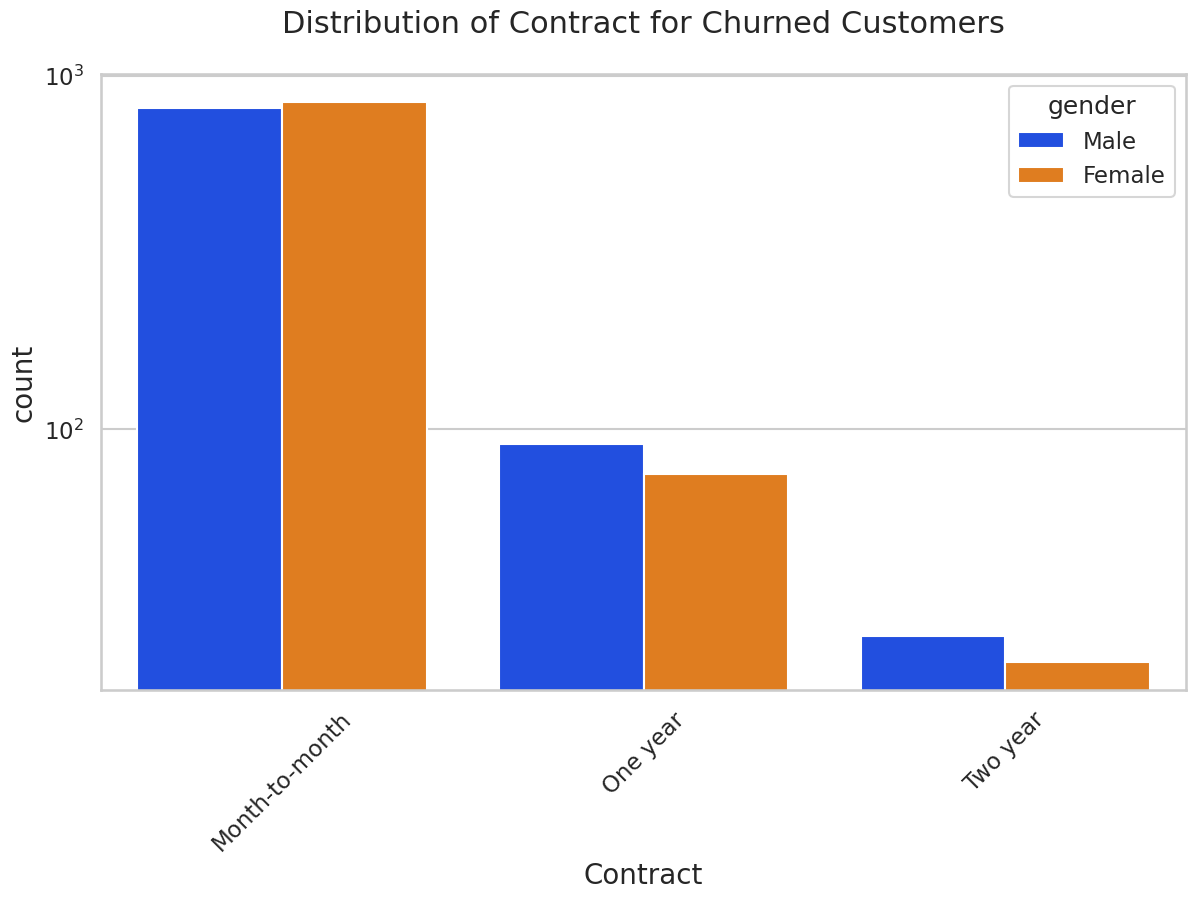

In [141]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

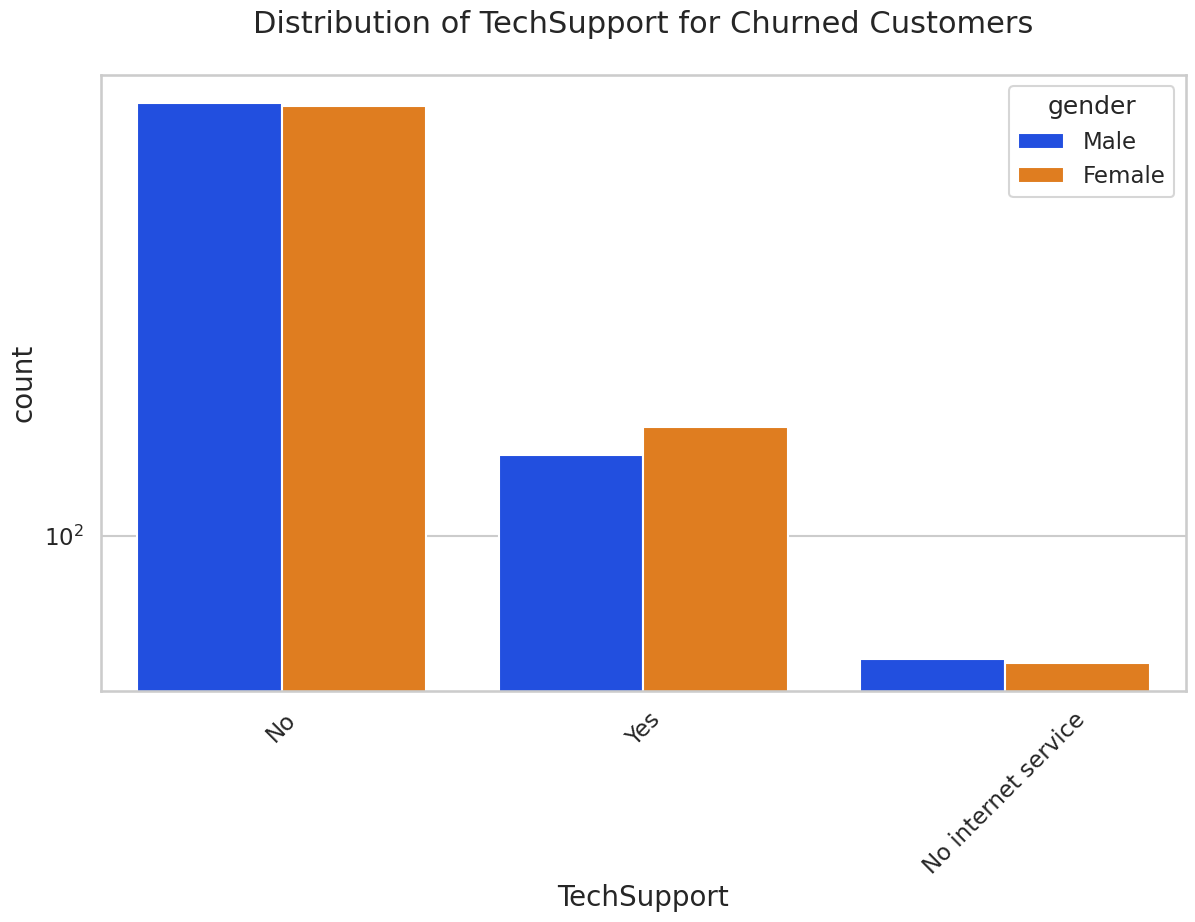

In [142]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

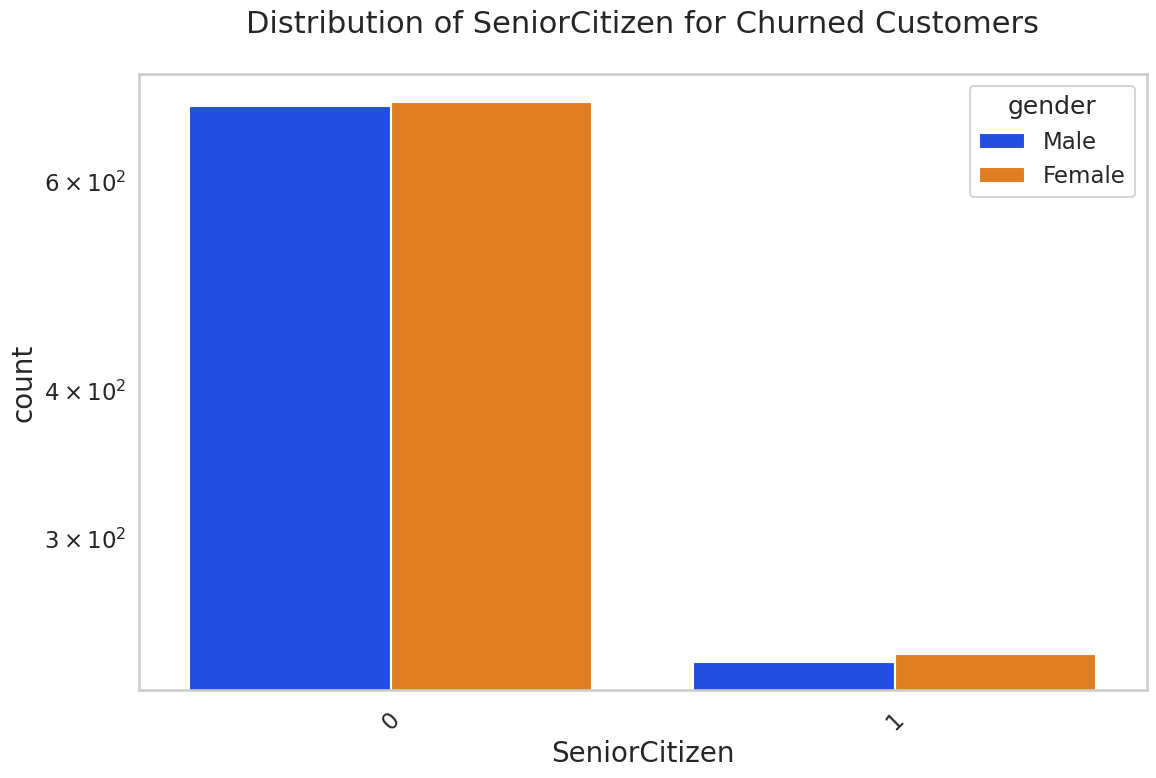

In [143]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [188]:
telco_data_dummies.to_csv('tel_churn.csv')

In [189]:
from google.colab import files



In [190]:
files.download('tel_churn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>